In [2]:
from canonical_toolkit.morphology.visual.plots.grid_plotter import GridPlotter, PlotterConfig, Alignment
import numpy as np

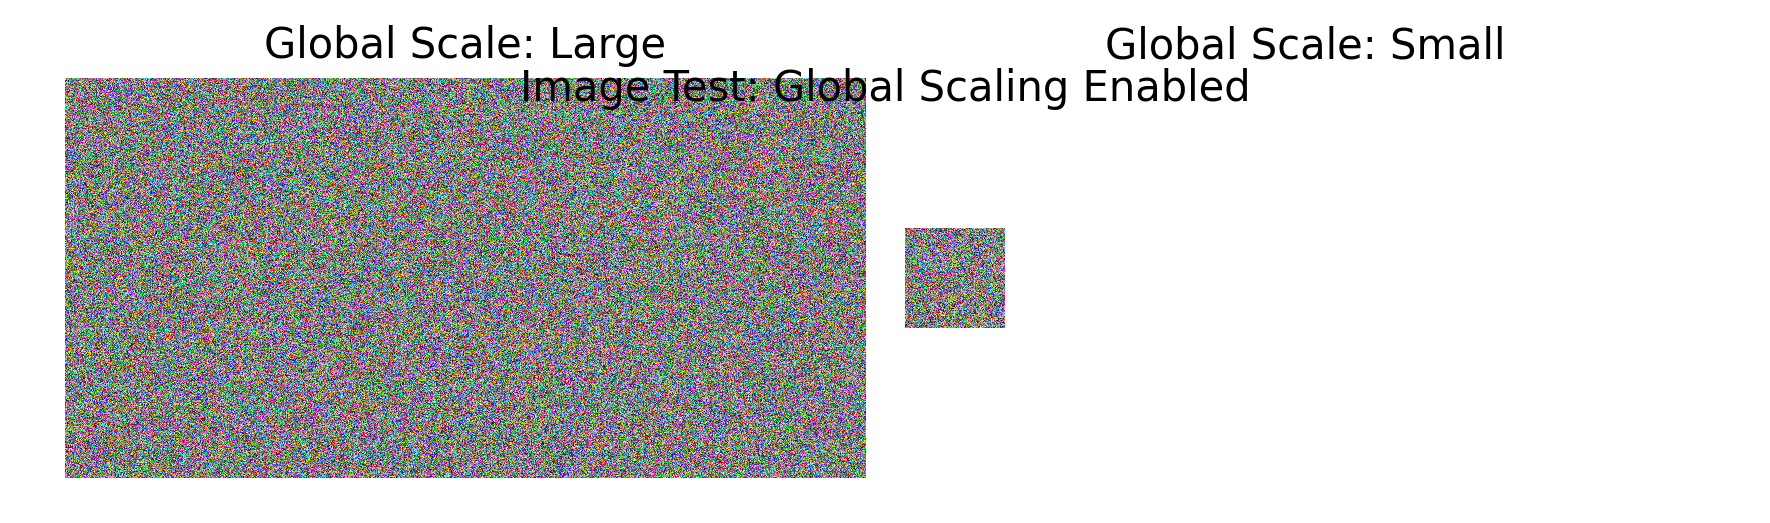

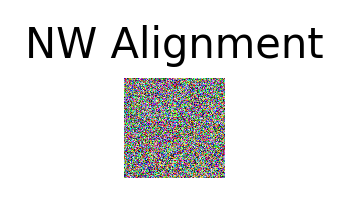

In [3]:
# Create dummy image data
large_landscape = np.random.rand(400, 800, 3) # 2:1 Aspect
small_square = np.random.rand(100, 100, 3)     # 1:1 Aspect

# Test A: Global Scaling ON (Small image should look small)
cfg_scaled = PlotterConfig(
    n_rows=1, n_cols=2, 
    keep_global_scale=True, 
    img_alignment=Alignment.W,
    cell_ratio=2.0 # Force cells to be wide
)
plotter_a = GridPlotter(config=cfg_scaled)
plotter_a.add_image_data([large_landscape, small_square], titles=["Global Scale: Large", "Global Scale: Small"])
plotter_a.suptitle("Image Test: Global Scaling Enabled")
plotter_a.plot()

# Test B: Alignment Test (Small image pinned to North-West)
cfg_align = PlotterConfig(
    n_rows=1, n_cols=2, 
    img_alignment=Alignment.NW,
    cell_ratio=1.0
)
plotter_b = GridPlotter(config=cfg_align)
plotter_b.add_image_data([small_square], titles=["NW Alignment"])
plotter_b.plot(highlight_padding=True) # View the "empty" space in the cell

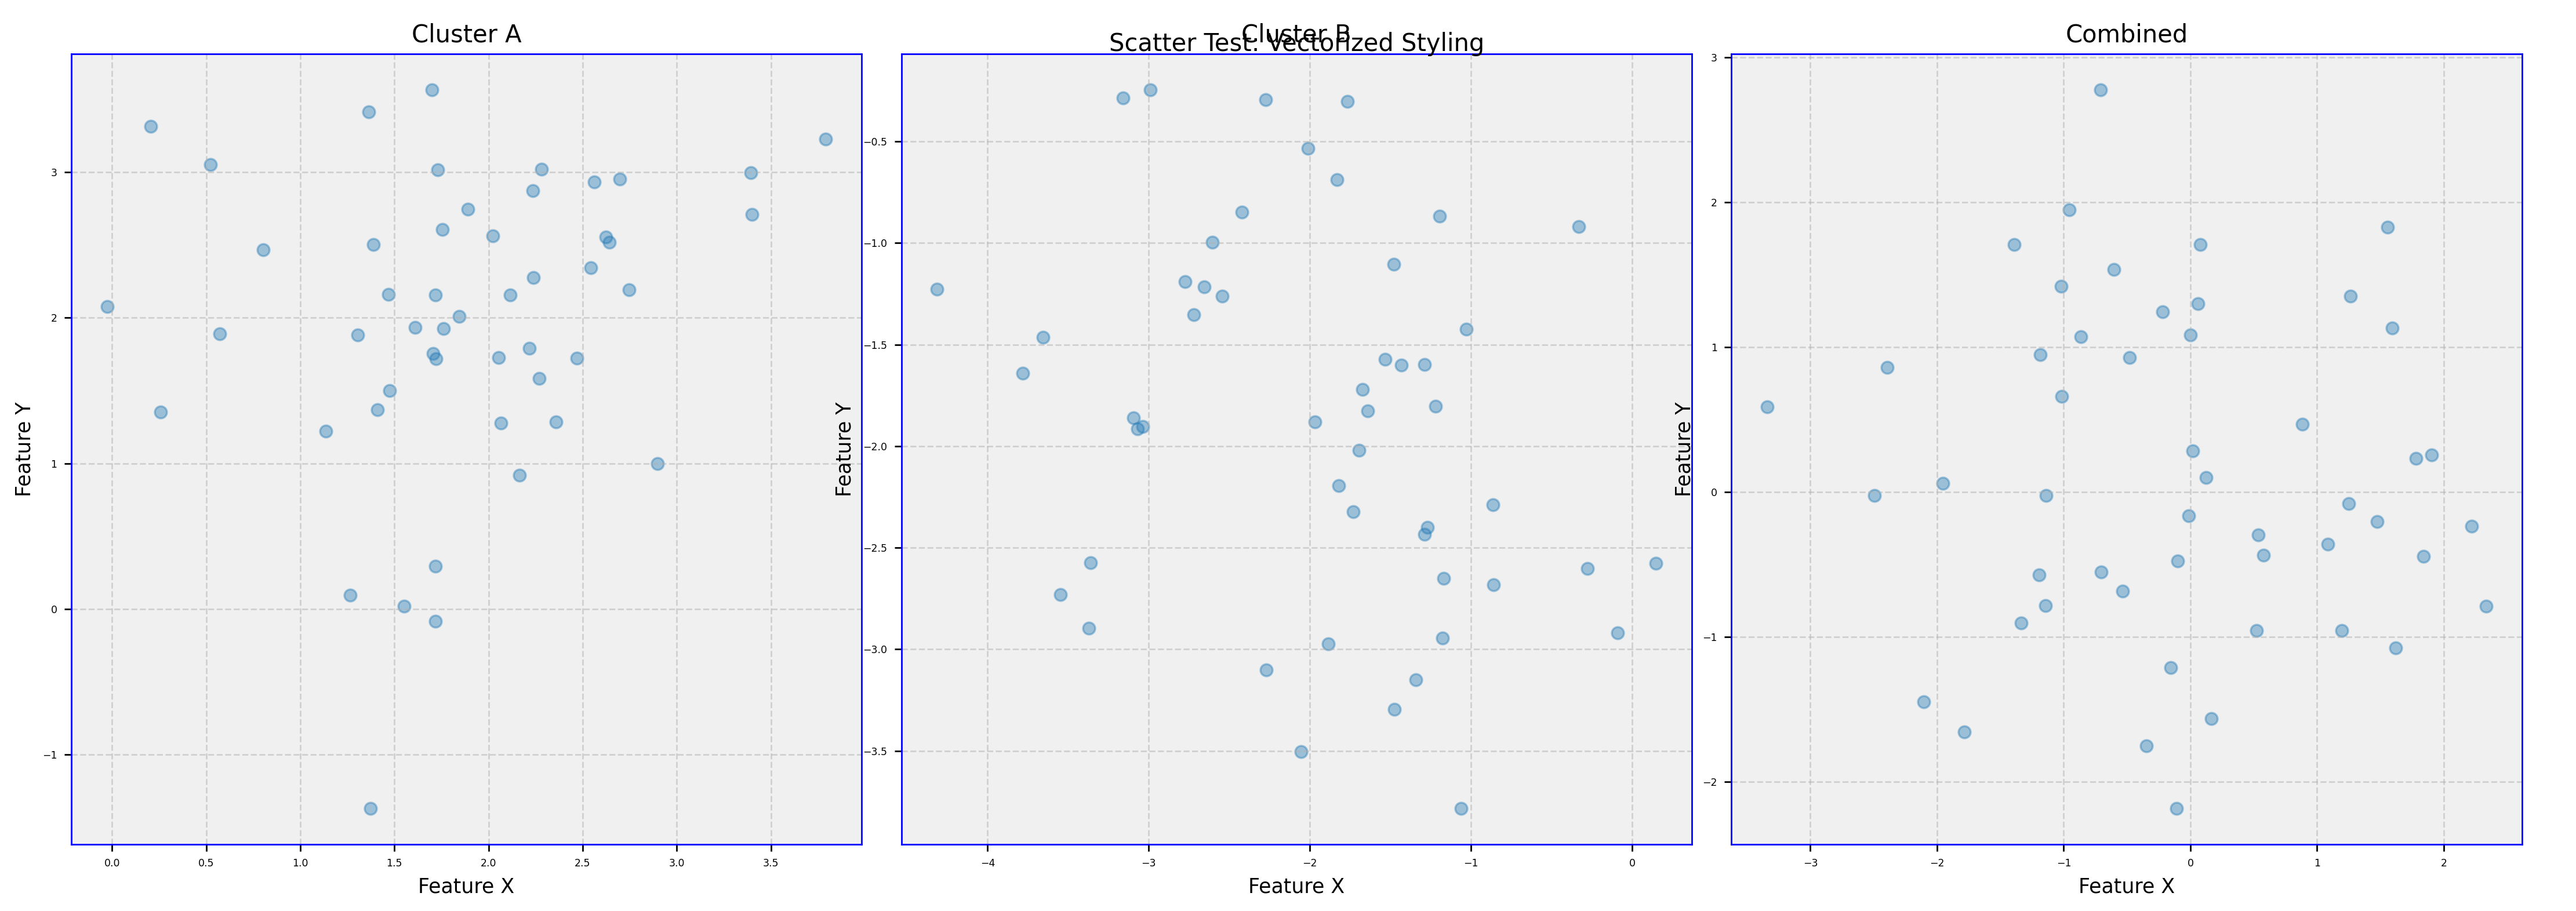

In [4]:
# Generate random clusters
cluster_1 = np.random.randn(50, 2) + [2, 2]
cluster_2 = np.random.randn(50, 2) + [-2, -2]
data_list = [cluster_1, cluster_2, cluster_1 + cluster_2]

plotter = GridPlotter(n_rows=1, n_cols=3)
plotter.config.grid_on = True
plotter.config.spine_color = "blue"

# Add data as scatter (detects Nx2 shape)
plotter.add_numeric_data(data_list, titles=["Cluster A", "Cluster B", "Combined"], alpha=0.4)

# USE THE PROXY: Select all axes in the first row and change their properties simultaneously
plotter[0, :].set_facecolor('#f0f0f0')
plotter[0, :].set_xlabel("Feature X")
plotter[0, :].set_ylabel("Feature Y")

plotter.suptitle("Scatter Test: Vectorized Styling")
plotter.plot()

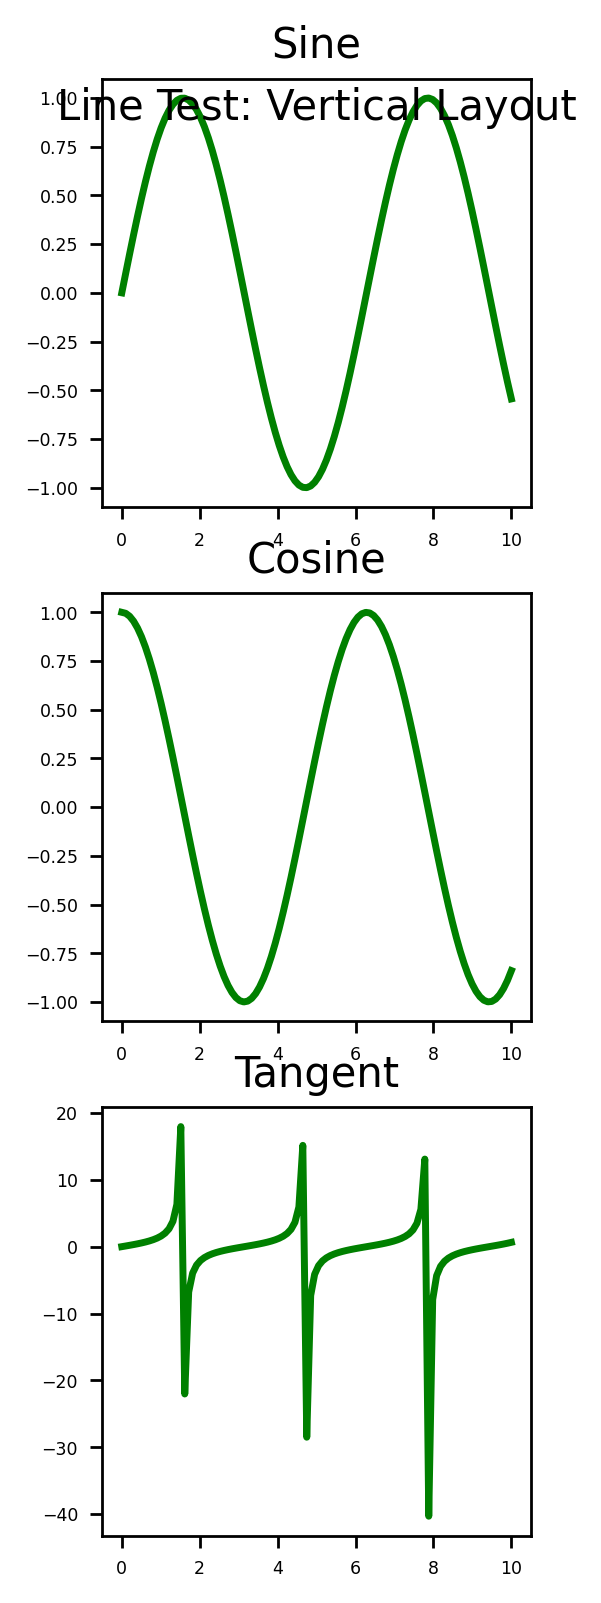

Transposing layout...


In [5]:
# Create sine/cosine data
x = np.linspace(0, 10, 100)
line_data = [
    [x, np.sin(x)],
    [x, np.cos(x)],
    [x, np.tan(x)]
]

# Initialize as 3 rows, 1 column
plotter = GridPlotter(n_rows=3, n_cols=1)
plotter.config.row_space = 0.2 # Add significant breathing room

plotter.add_numeric_data(line_data, titles=["Sine", "Cosine", "Tangent"], color="green", lw=2)

# Verify the coordinate lock doesn't break line plots
# (Line plots set axis 'on' automatically in your code)
plotter.suptitle("Line Test: Vertical Layout")
plotter.plot()

# TEST TRANSPOSITION
print("Transposing layout...")
plotter.transpose()
plotter.suptitle("Line Test: Transposed to Horizontal")
plotter.plot()

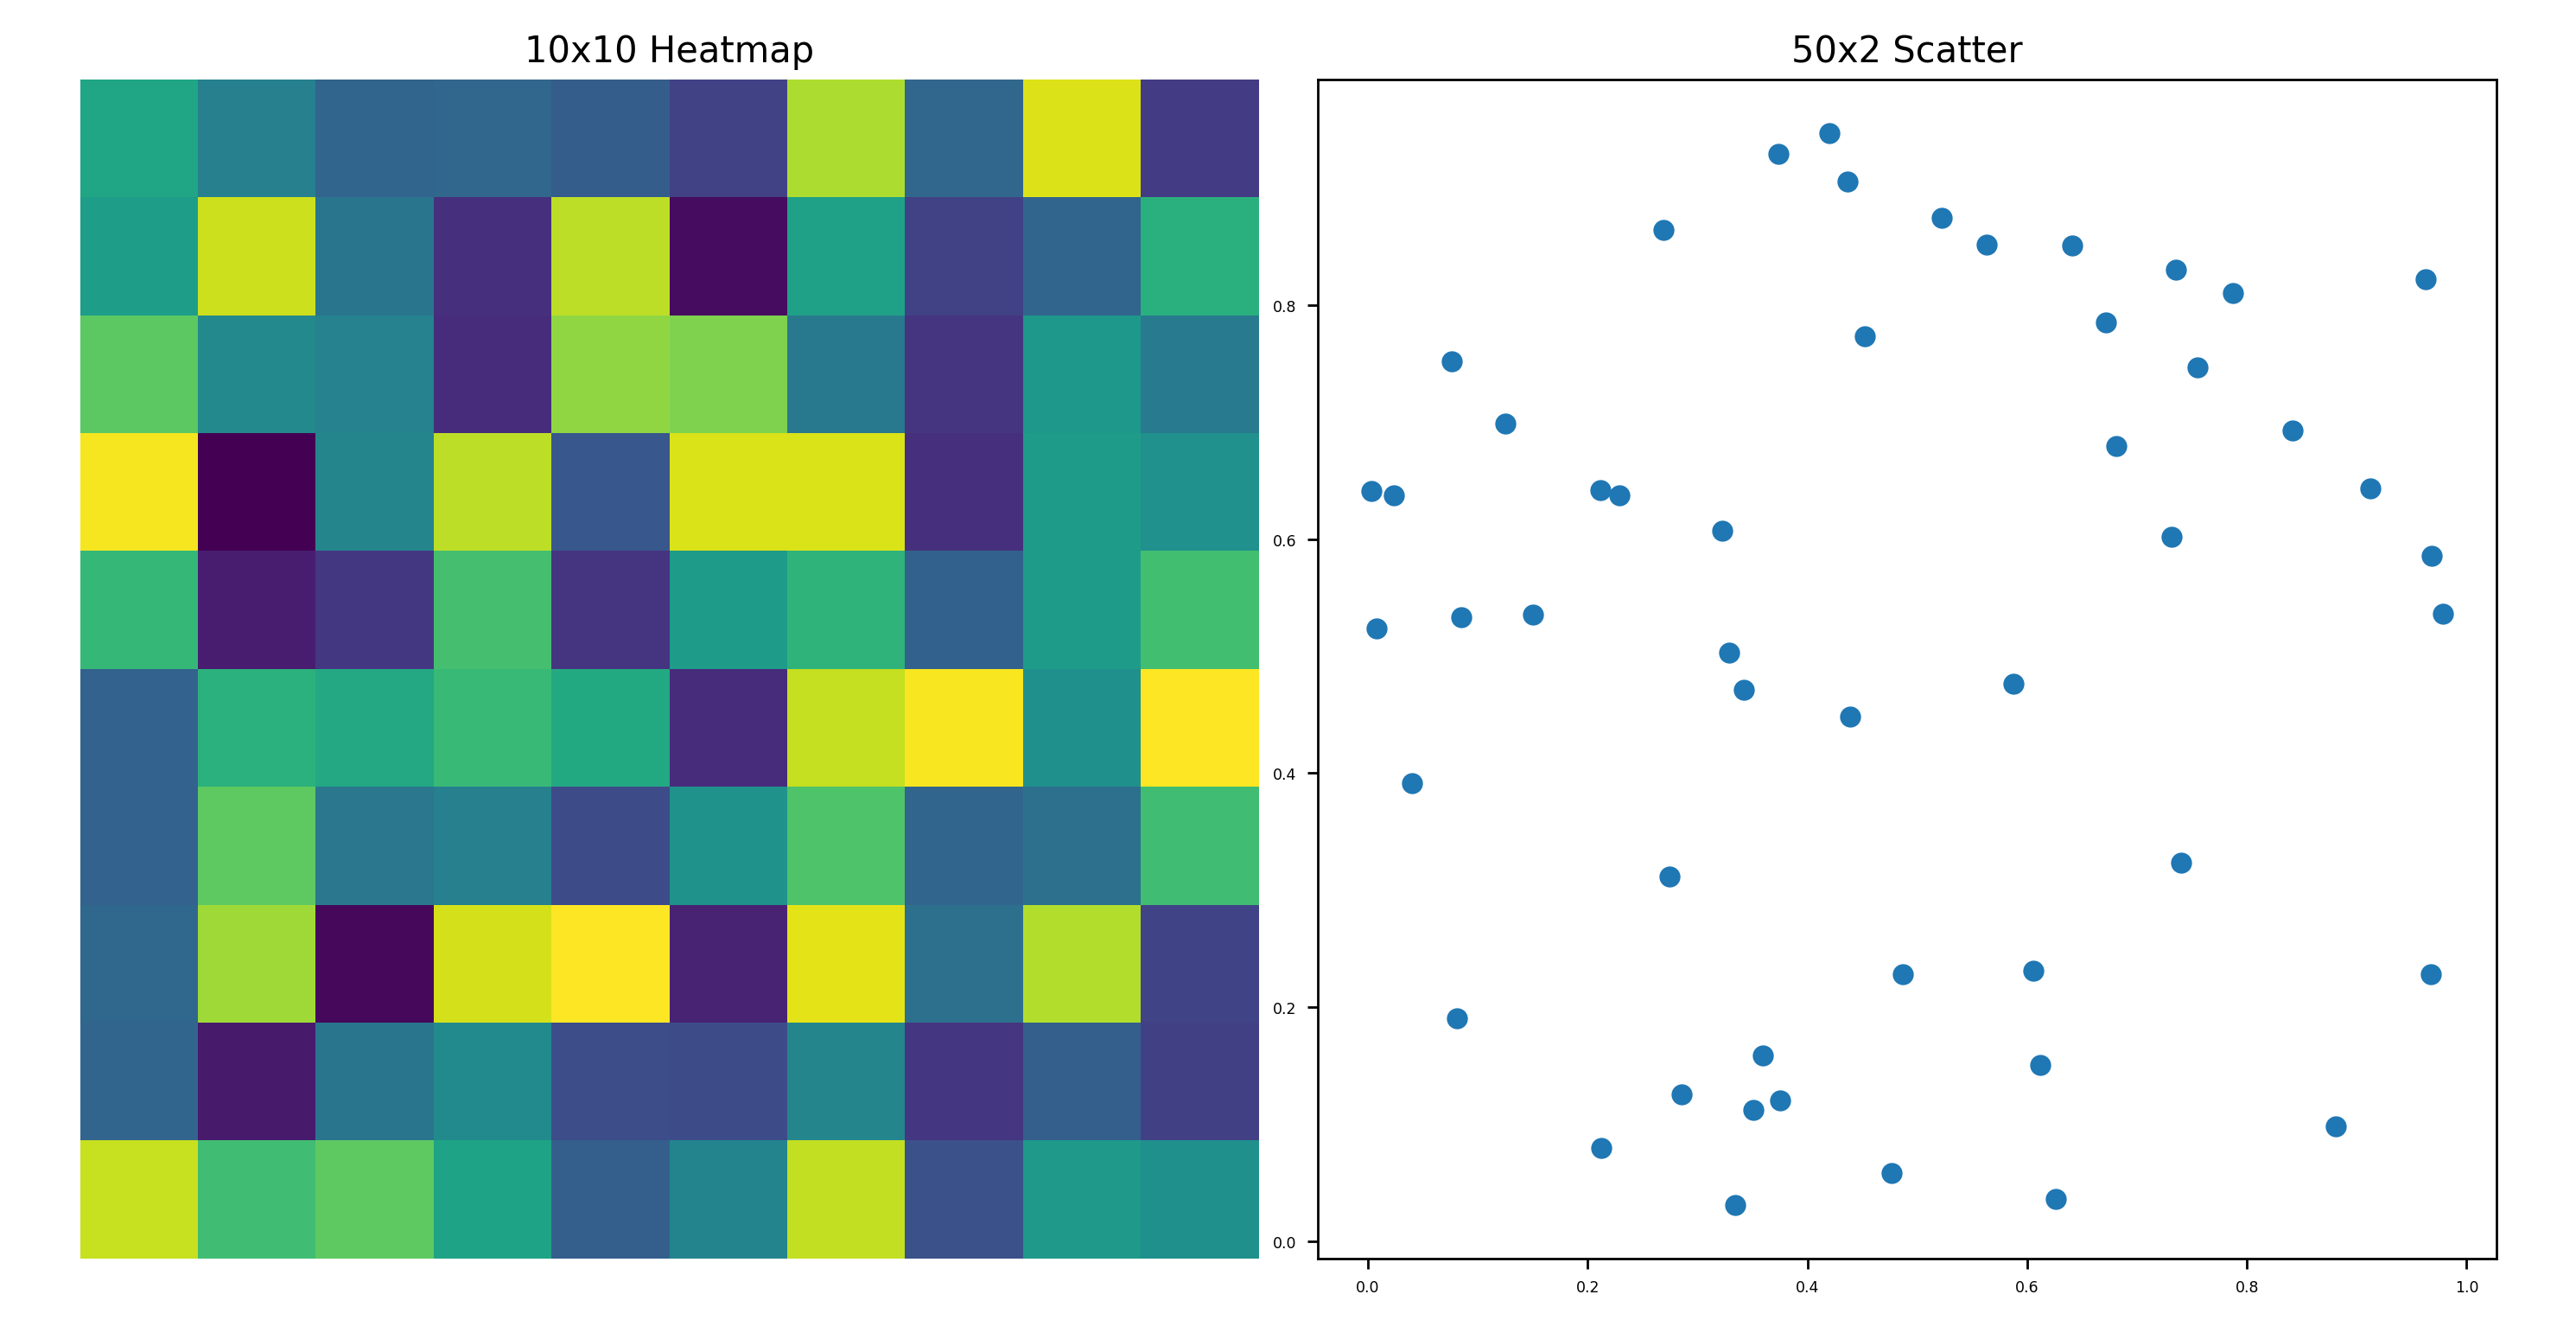

In [17]:
# 1. Square Matrix (Heatmap)
heatmap_data = np.random.rand(10, 10) 

# 2. Rectangular Matrix (Scatter)
scatter_data = np.random.rand(50, 2) 

plotter = GridPlotter(n_rows=1, n_cols=2)
# Heatmap should render as an image, Scatter should render as dots
plotter.add_numeric_data([heatmap_data, scatter_data], titles=["10x10 Heatmap", "50x2 Scatter"])

plotter.plot()

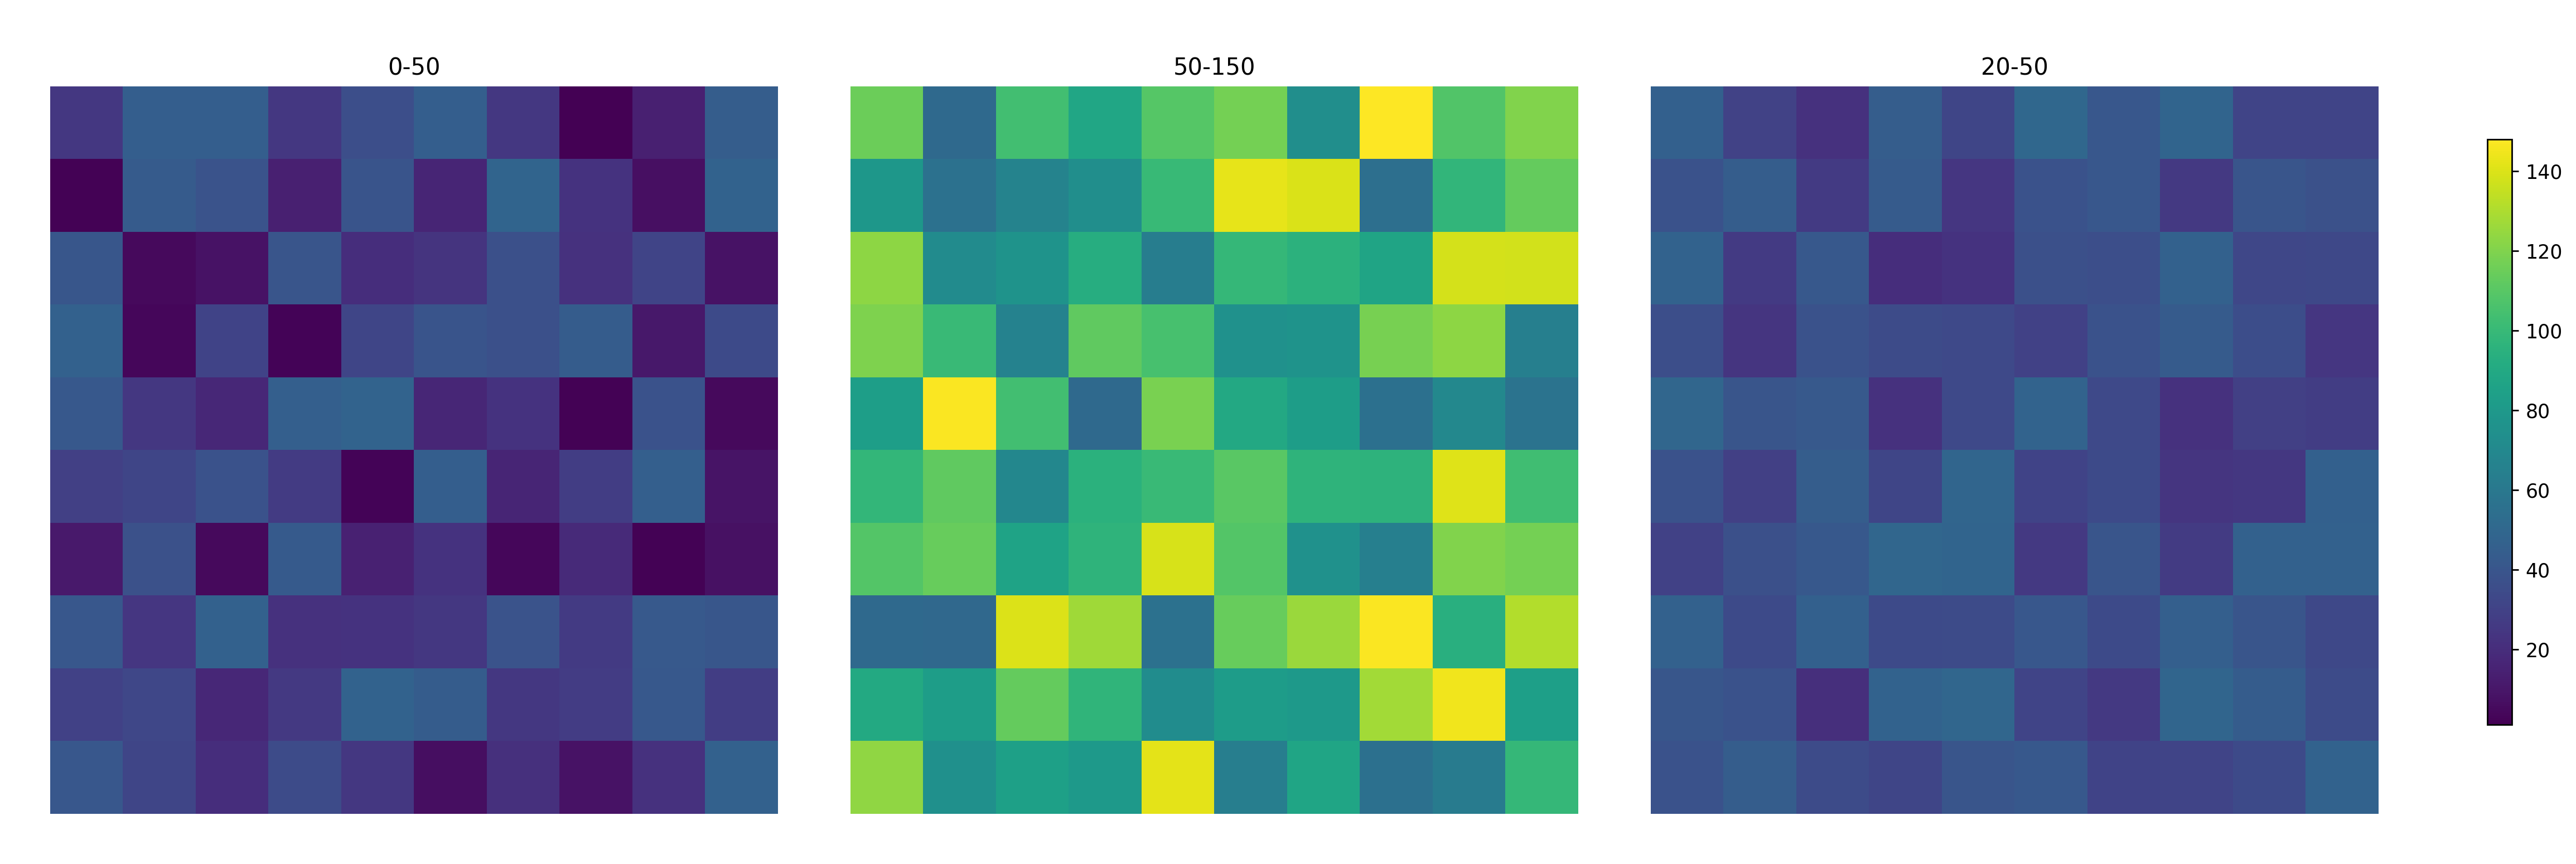

In [8]:
import numpy as np                                                                                                                                          
from canonical_toolkit.morphology.visual.plots.grid_plotter import GridPlotter                                                                              
                                                                                                                                                            
# Create heatmaps with different value ranges                                                                                                               
heatmap1 = np.random.rand(10, 10) * 50          # 0-50                                                                                                      
heatmap2 = np.random.rand(10, 10) * 100 + 50    # 50-150                                                                                                    
heatmap3 = np.random.rand(10, 10) * 30 + 20     # 20-50                                                                                                     
                                                                                                                                                            
plotter = GridPlotter(n_rows=1, n_cols=3)                                                                                                                   
plotter.config.col_space = 0.1                                                                                                                              
plotter.config.margin = (0.1, 0.15, 0.05, 0.05)  # extra right margin for colorbar                                                                          
                                                                                                                                                            
plotter.add_numeric_data(                                                                                                                                   
    [heatmap1, heatmap2, heatmap3],                                                                                                                         
    titles=["0-50", "50-150", "20-50"]                                                                                                                      
)                                                                                                                                                           
plotter.add_global_colorbar(location='right')                                                                                                               
plotter.plot()

In [9]:
from canonical_toolkit.morphology.visual.viewer import quick_view
from canonical_toolkit.utils.initialize import intitialize_random_graph_population
from canonical_toolkit.morphology.visual.snapshots import snapshot_loader, snapshot_saver, snapshot_thumbnail_converter

In [10]:
graph_population = intitialize_random_graph_population(100, n_jobs=1)

# snapshot_saver(graph_population, "__data__/snapshots", n_jobs=1)
# snapshots = snapshot_loader()

Output()

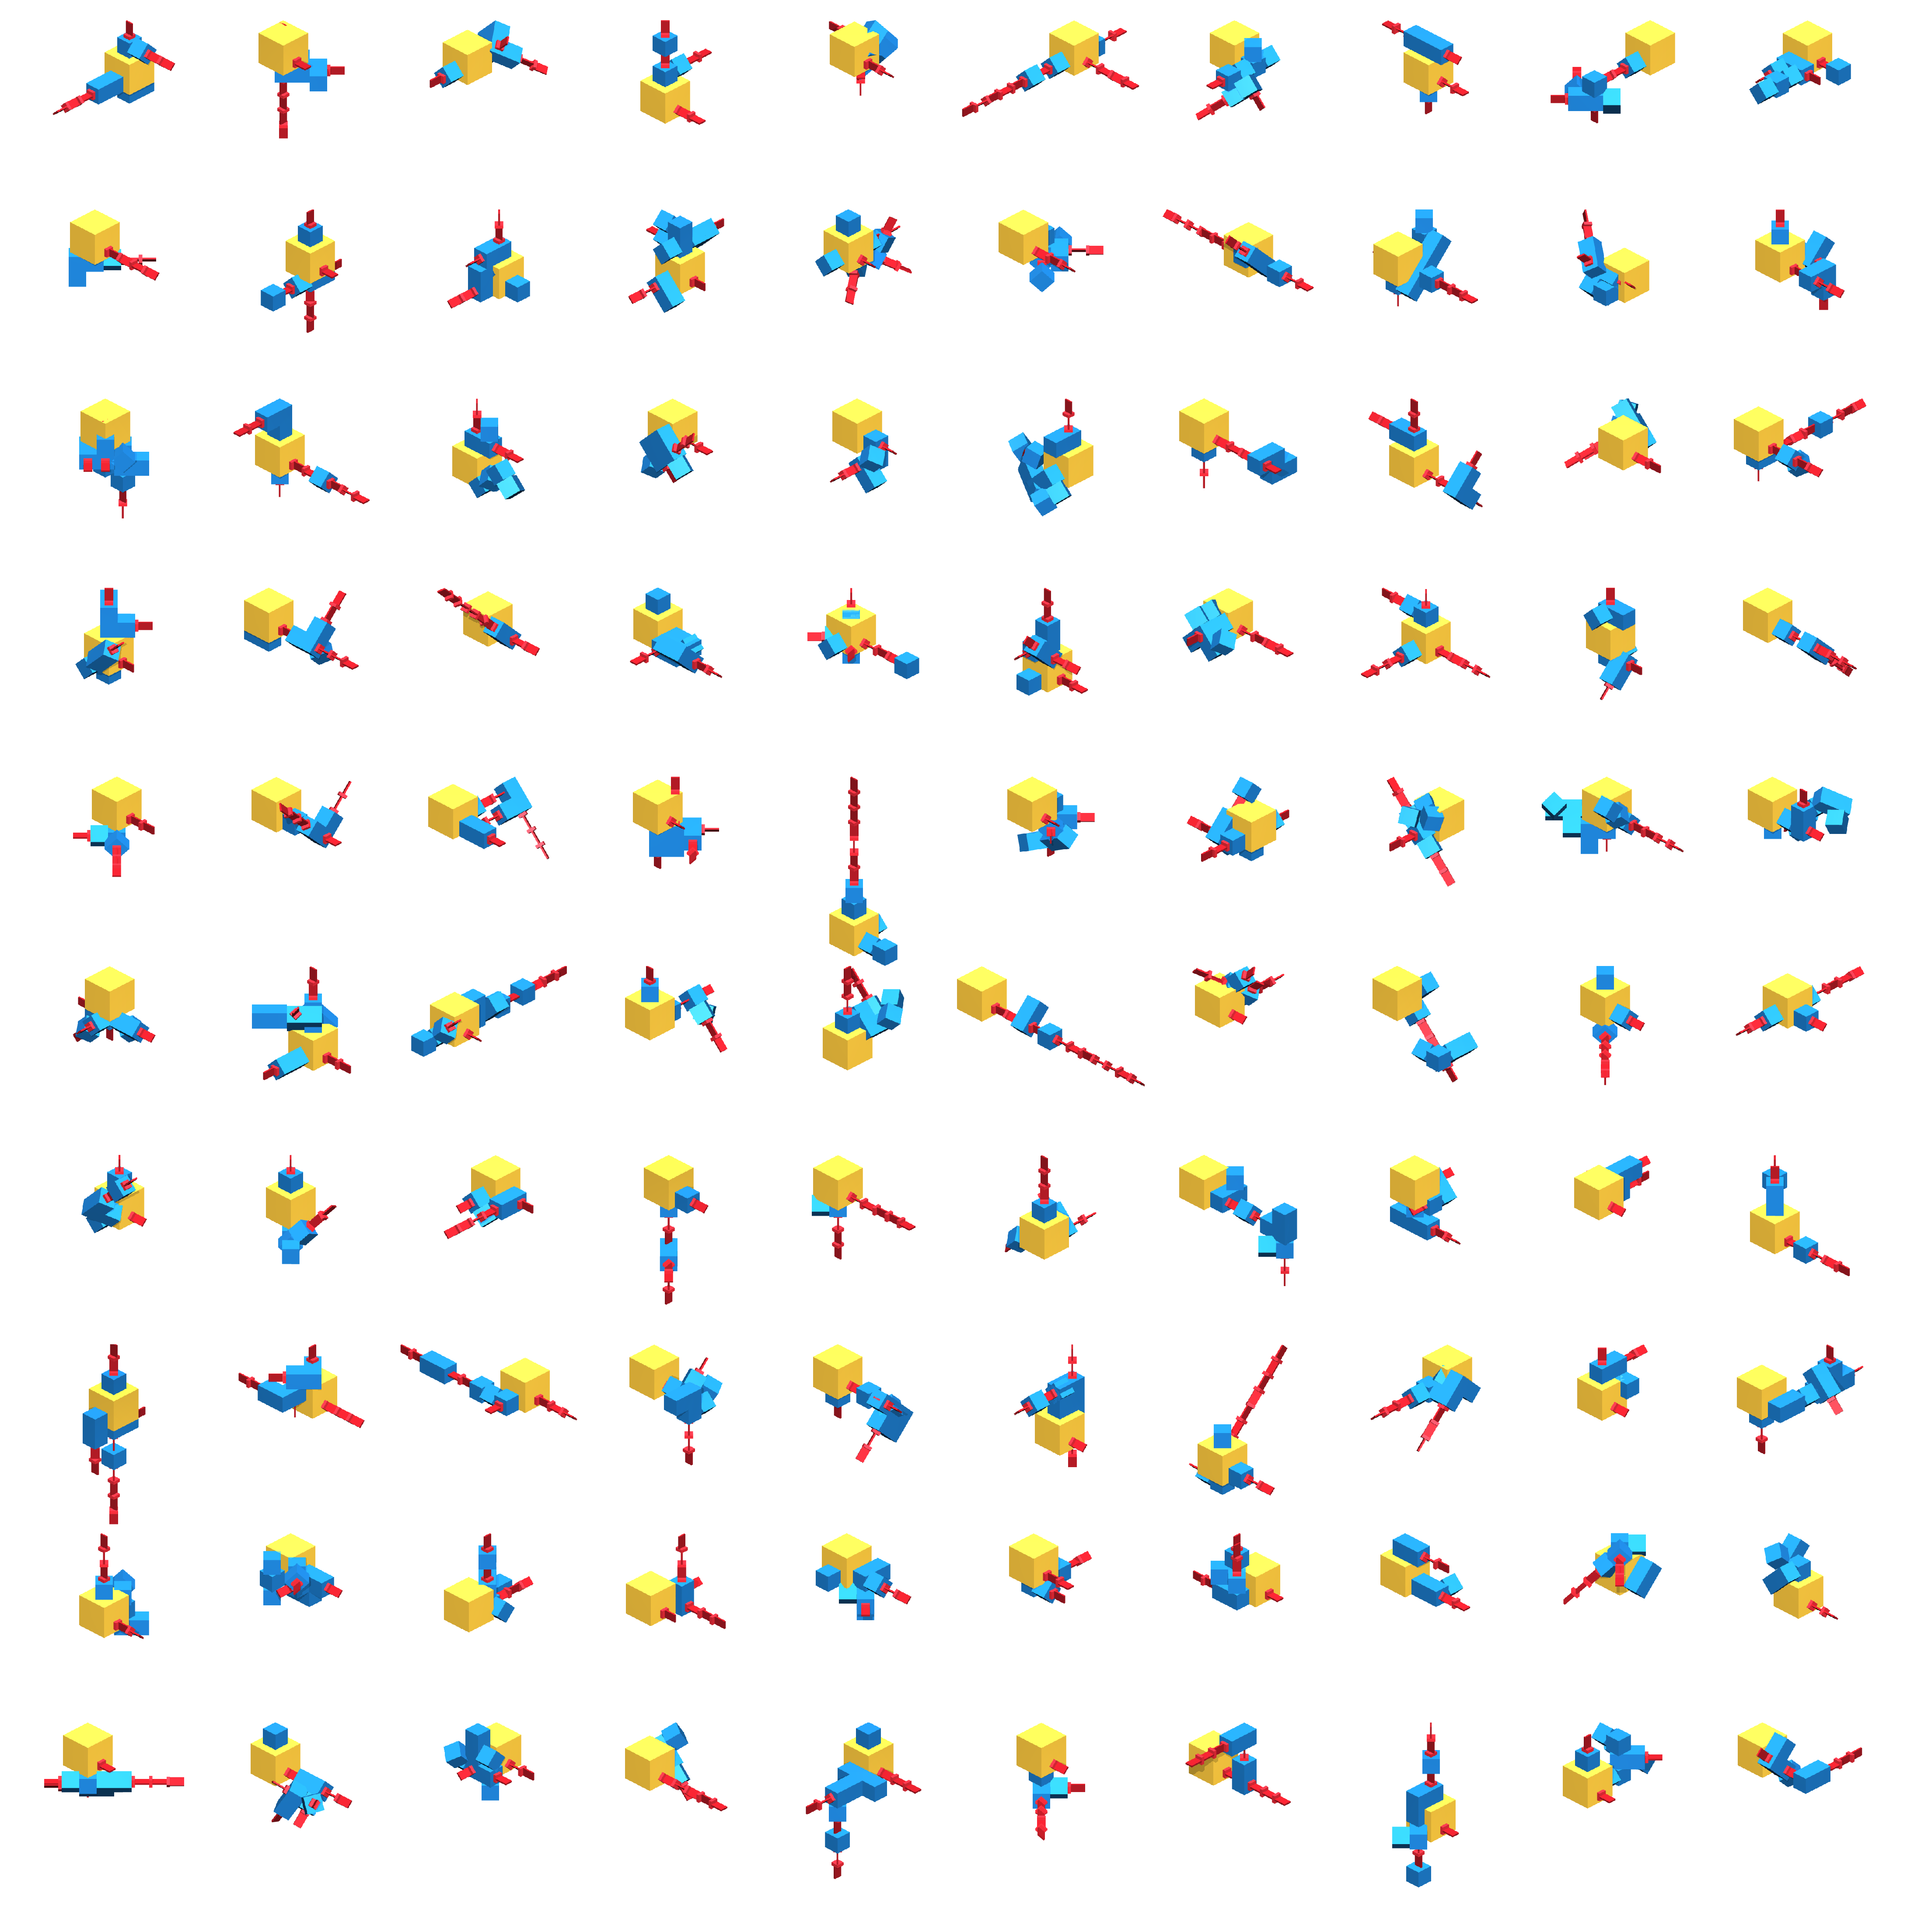

In [16]:
plotter = GridPlotter()

# snapshots_np = [np.array(img) for img in snapshots]
plotter.config.col_space = 0
plotter.config.row_space = 0
plotter.config.keep_global_scale = True
plotter.config.fit_fig_to_content = True
plotter.config.dpi = 300
plotter.config.img_alignment = Alignment.N
plotter.config.title_size = 12
plotter.add_image_data(data_folder='__data__/snapshots', shape=(10,10))
plotter[:,:].set_title(None)
# plotter.reshape(4,20)
plotter.plot()

In [12]:
from canonical_toolkit.morphology.visual.plots import *

Output()

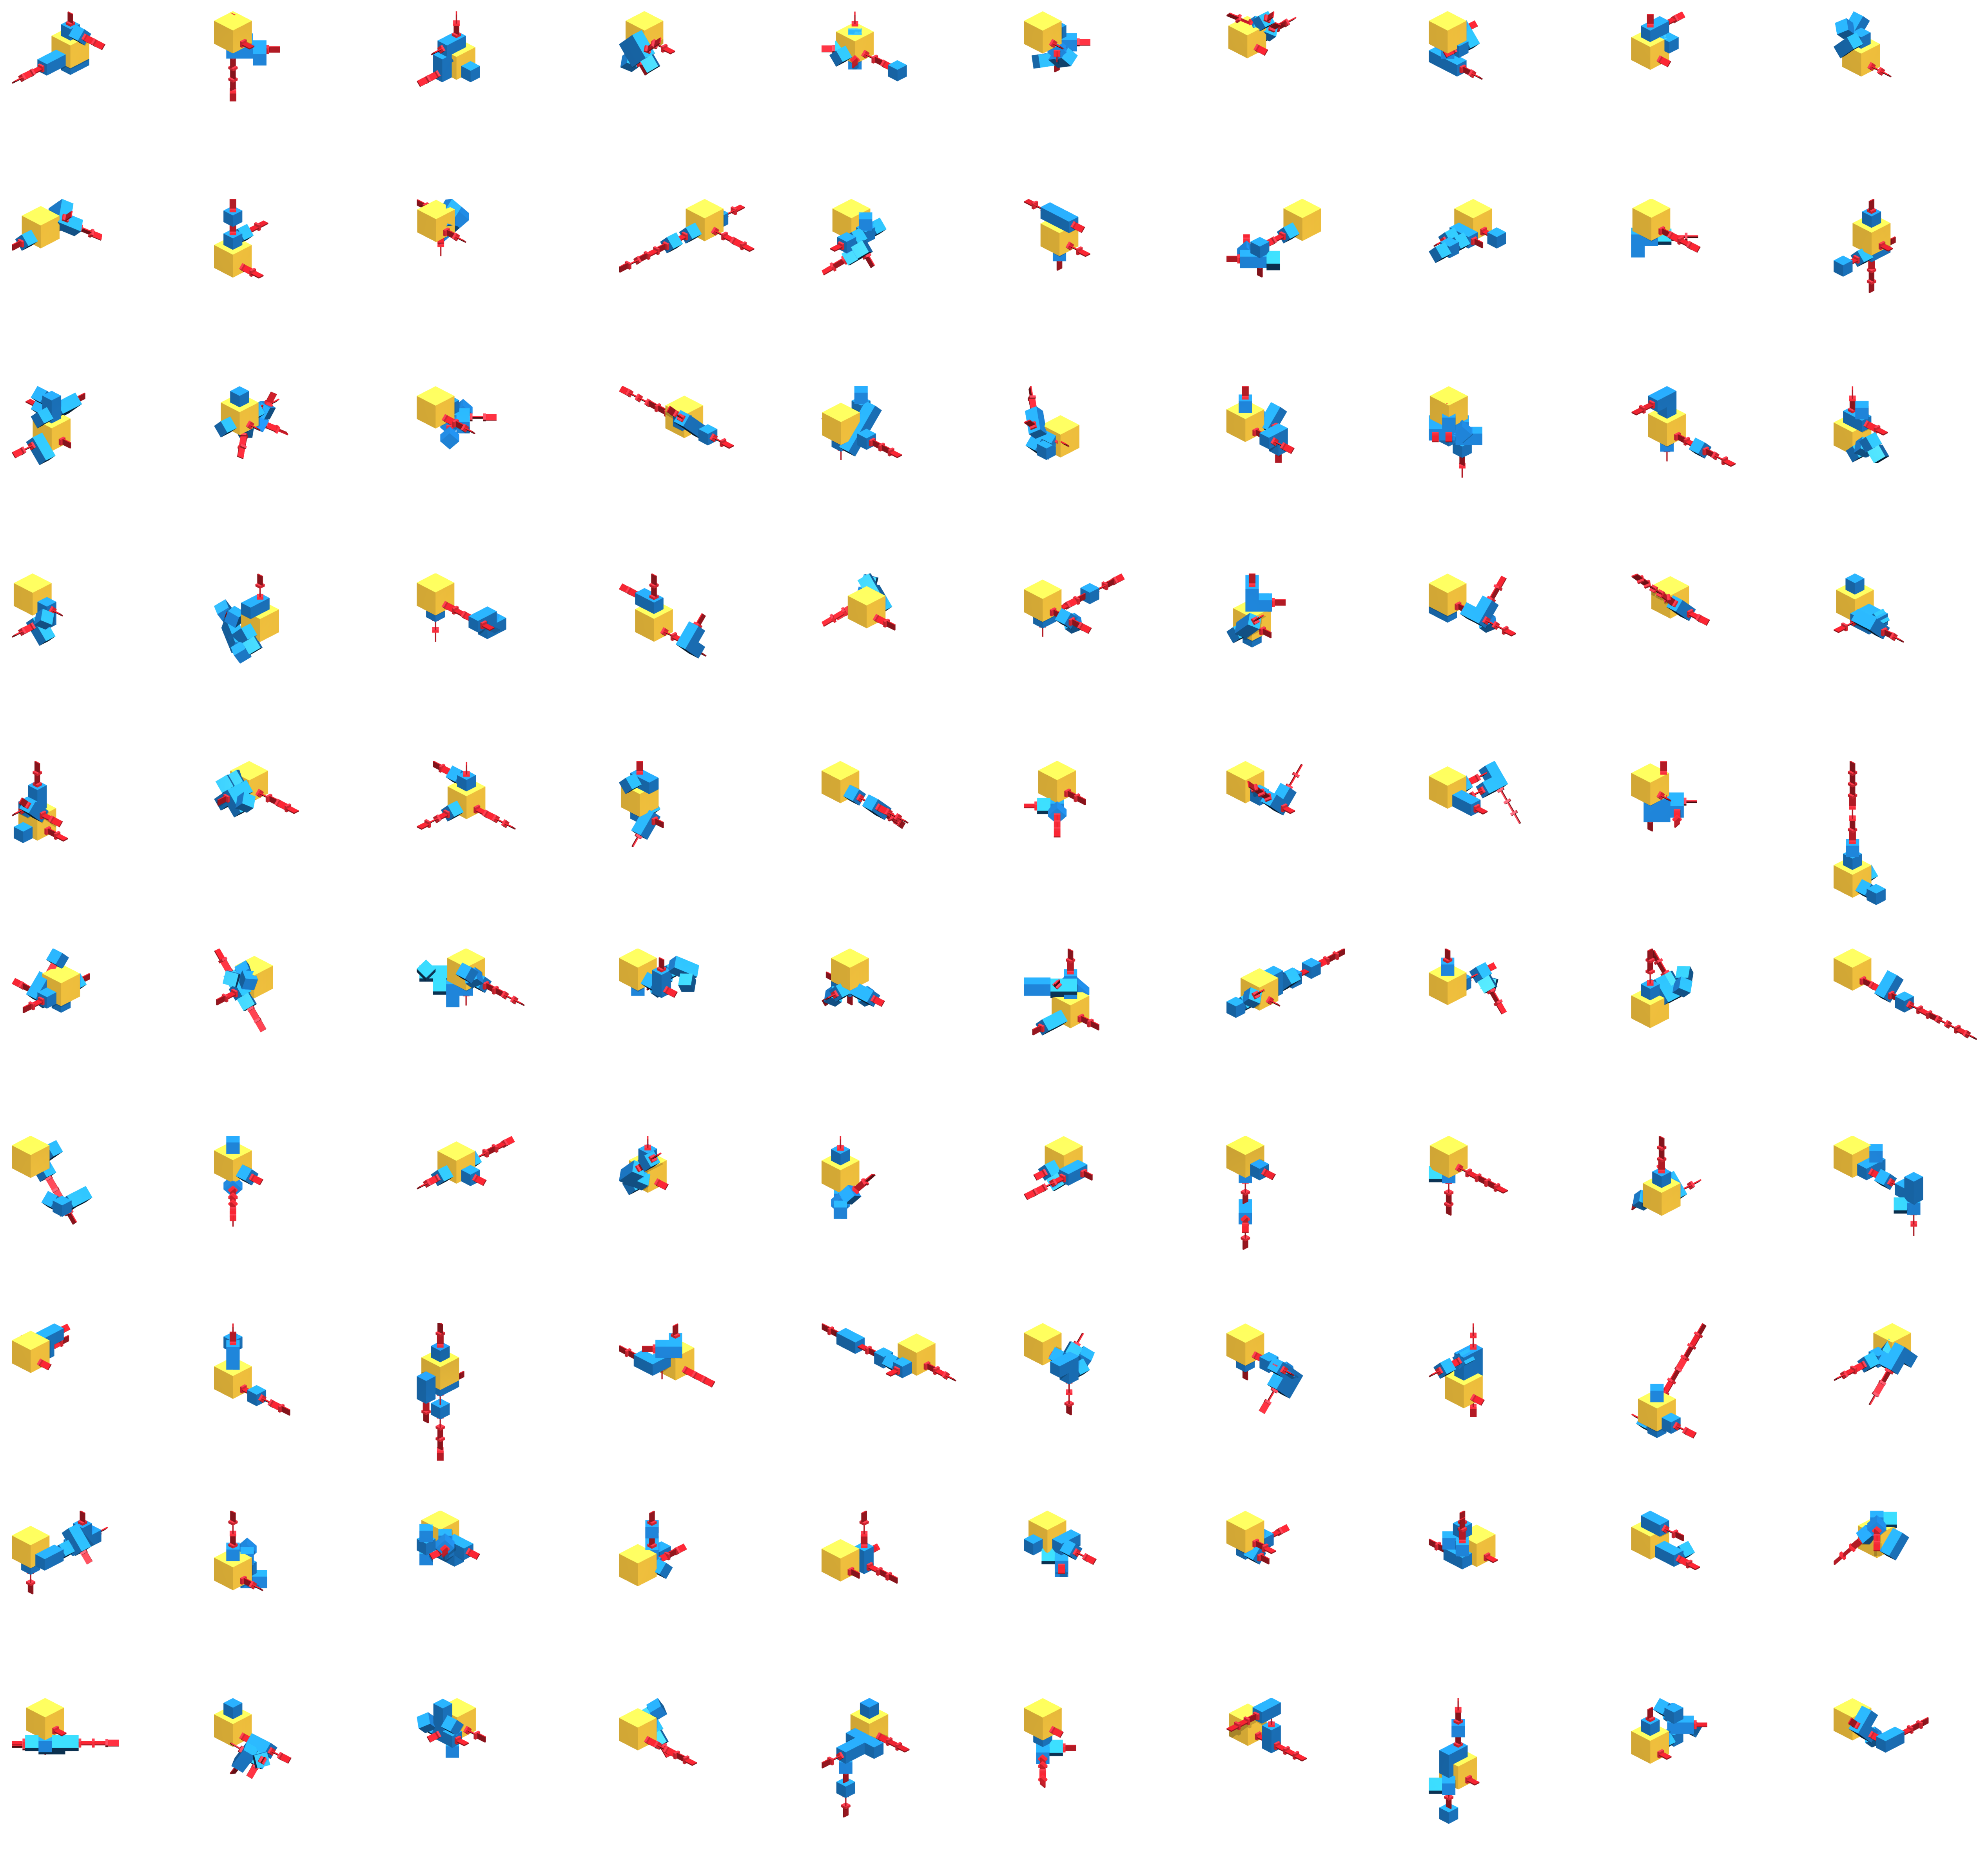

In [13]:
plotter2 = SnapshotGridPlotter.from_snapshot_folder("__data__/snapshots", grid_shape=(10,10), snapshots_per_subplot=1)
plotter2.plot()